In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df = pd.read_csv(r'train_data.csv', sep=',')
df.info()

C:\Users\matil\AppData\Local\Temp\ipykernel_11536\578681040.py:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'train_data.csv', sep=',')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Identifier          

In [47]:
df.isna().sum()

Accident Date                          23134
Age at Injury                          19445
Alternative Dispute Resolution         19445
Assembly Date                              0
Attorney/Representative                19445
Average Weekly Wage                    48096
Birth Year                             48523
C-2 Date                               34005
C-3 Date                              406226
Carrier Name                           19445
Carrier Type                           19445
Claim Identifier                           0
Claim Injury Type                      19445
County of Injury                       19445
COVID-19 Indicator                     19445
District Name                          19445
First Hearing Date                    442673
Gender                                 19445
IME-4 Count                           460668
Industry Code                          29403
Industry Code Description              29403
Medical Fee Region                     19445
OIICS Natu

In [48]:
df[df['Age at Injury'].isnull()]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
3,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593465,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593466,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593468,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593469,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Remove 19445 rows with NaN values

In [49]:
df_nulos = df[df['Age at Injury'].isnull()]
df = df.drop(df_nulos.index)
df = df.drop('OIICS Nature of Injury Description', axis=1)

# Calculate the number of NaNs for each column
nan_counts = df.isna().sum()

# Get the total number of rows (entries) in the DataFrame
total_rows = df.shape[0]

# Calculate the percentage of NaN values for each column
percentage_nans = (nan_counts / total_rows) * 100

# Format the percentage with '%' sign
percentage_nans = percentage_nans.apply(lambda x: f"{x:.2f}%")

# Combine all information into a DataFrame for better readability
nan_summary = pd.DataFrame({
    'NaN Count': nan_counts,
    'Total Values': [total_rows] * len(nan_counts),  # Ensure this column matches the length of nan_counts
    'Percentage NaN': percentage_nans
})

# Print the result
print("Summary of NaN values per column:")
print(nan_summary)

Summary of NaN values per column:
                                   NaN Count  Total Values Percentage NaN
Accident Date                           3689        574026          0.64%
Age at Injury                              0        574026          0.00%
Alternative Dispute Resolution             0        574026          0.00%
Assembly Date                              0        574026          0.00%
Attorney/Representative                    0        574026          0.00%
Average Weekly Wage                    28651        574026          4.99%
Birth Year                             29078        574026          5.07%
C-2 Date                               14560        574026          2.54%
C-3 Date                              386781        574026         67.38%
Carrier Name                               0        574026          0.00%
Carrier Type                               0        574026          0.00%
Claim Identifier                           0        574026          0.00%
Clai

In [50]:
df.duplicated().sum()

0

In [51]:
df.describe()

,Age at Injury,Average Weekly Wage,Birth Year,Claim Identifier,IME-4 Count,Industry Code,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Agreement Reached,Number of Dependents
count,574026.000000,5.453750e+05,544948.000000,5.740260e+05,132803.000000,564068.000000,558386.000000,558369.000000,556944.000000,574026.000000,574026.000000
mean,42.114270,4.910883e+02,1886.767604,5.778956e+06,3.207337,58.645305,54.381143,41.013839,39.738146,0.046665,3.006559
std,14.256432,6.092918e+03,414.644423,2.223082e+05,2.832303,19.644175,25.874281,22.207521,22.365940,0.210921,2.000801
min,0.000000,0.000000e+00,0.000000,5.393066e+06,1.000000,11.000000,1.000000,1.000000,-9.000000,0.000000,0.000000
25%,31.000000,0.000000e+00,1965.000000,5.586764e+06,1.000000,45.000000,31.000000,16.000000,33.000000,0.000000,1.000000
50%,42.000000,0.000000e+00,1977.000000,5.778282e+06,2.000000,61.000000,56.000000,49.000000,38.000000,0.000000,3.000000
75%,54.000000,8.410000e+02,1989.000000,5.971329e+06,4.000000,71.000000,75.000000,52.000000,53.000000,0.000000,5.000000
max,117.000000,2.828079e+06,2018.000000,6.165685e+06,73.000000,92.000000,99.000000,91.000000,99.000000,1.000000,6.000000


# Single Variables

In [52]:
df_numeric = df.select_dtypes(include=['number']) 
df_non_numeric = df.drop(df_numeric.columns, axis=1)

df_numeric

,Age at Injury,Average Weekly Wage,Birth Year,Claim Identifier,IME-4 Count,Industry Code,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Agreement Reached,Number of Dependents
0,31.0,0.00,1988.0,5393875,NaN,44.0,27.0,10.0,62.0,0.0,1.0
1,46.0,1745.93,1973.0,5393091,4.0,23.0,97.0,49.0,38.0,1.0,4.0
2,40.0,1434.80,1979.0,5393889,NaN,56.0,79.0,7.0,10.0,0.0,6.0
4,61.0,NaN,1958.0,5393887,NaN,62.0,16.0,43.0,36.0,0.0,1.0
5,67.0,0.00,1952.0,5393863,NaN,44.0,31.0,10.0,38.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
593451,35.0,0.00,1987.0,6165265,NaN,56.0,45.0,10.0,42.0,0.0,4.0
593455,33.0,0.00,1989.0,6165285,NaN,62.0,74.0,37.0,35.0,0.0,6.0
593456,61.0,991.08,1961.0,6165506,1.0,62.0,98.0,80.0,34.0,0.0,3.0
593457,24.0,0.00,1998.0,6165339,NaN,62.0,59.0,59.0,55.0,0.0,5.0


c:\Users\matil\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\matil\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\matil\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\matil\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

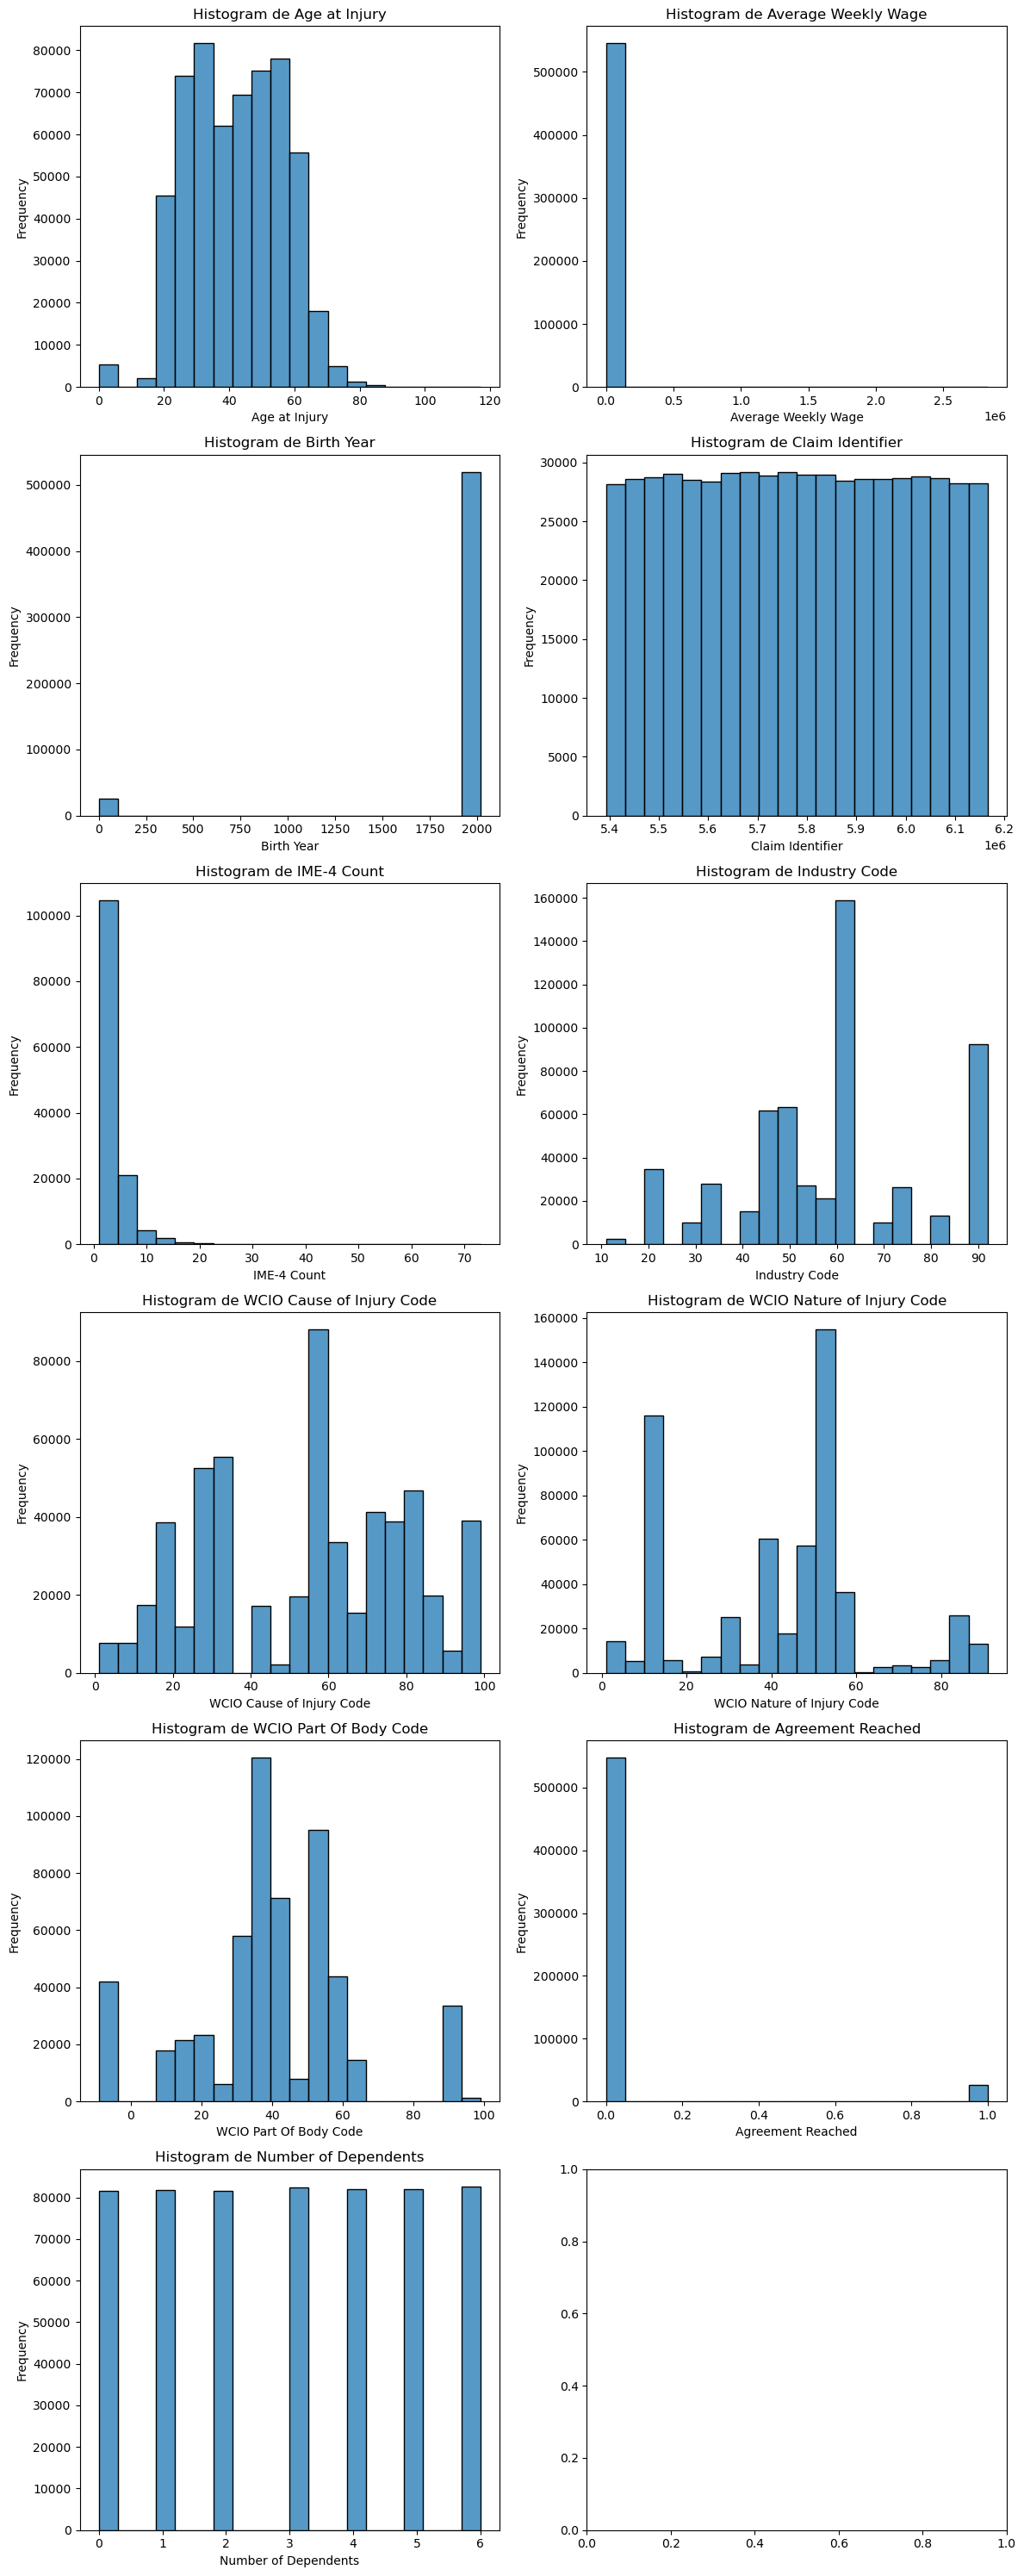

In [53]:
fig, axes = plt.subplots(6, 2, figsize=(12, 30), tight_layout=True)

axes = axes.flatten()

for i, column in enumerate(df_numeric):
    sns.histplot(x=df_numeric[column], bins=20, ax=axes[i])
    axes[i].set_title(f'Histogram de {column}')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()  
plt.show()

In [54]:
#ver os 0 no age at injury
#average weekly wage é melhor ver num boxplot
#birth year 0 ta errado
#histograma de agreement reached não faz sentido pq é binnaria
#escala do histograma de number of dependents deve ser alterada (começar em 70000 por exemplo)

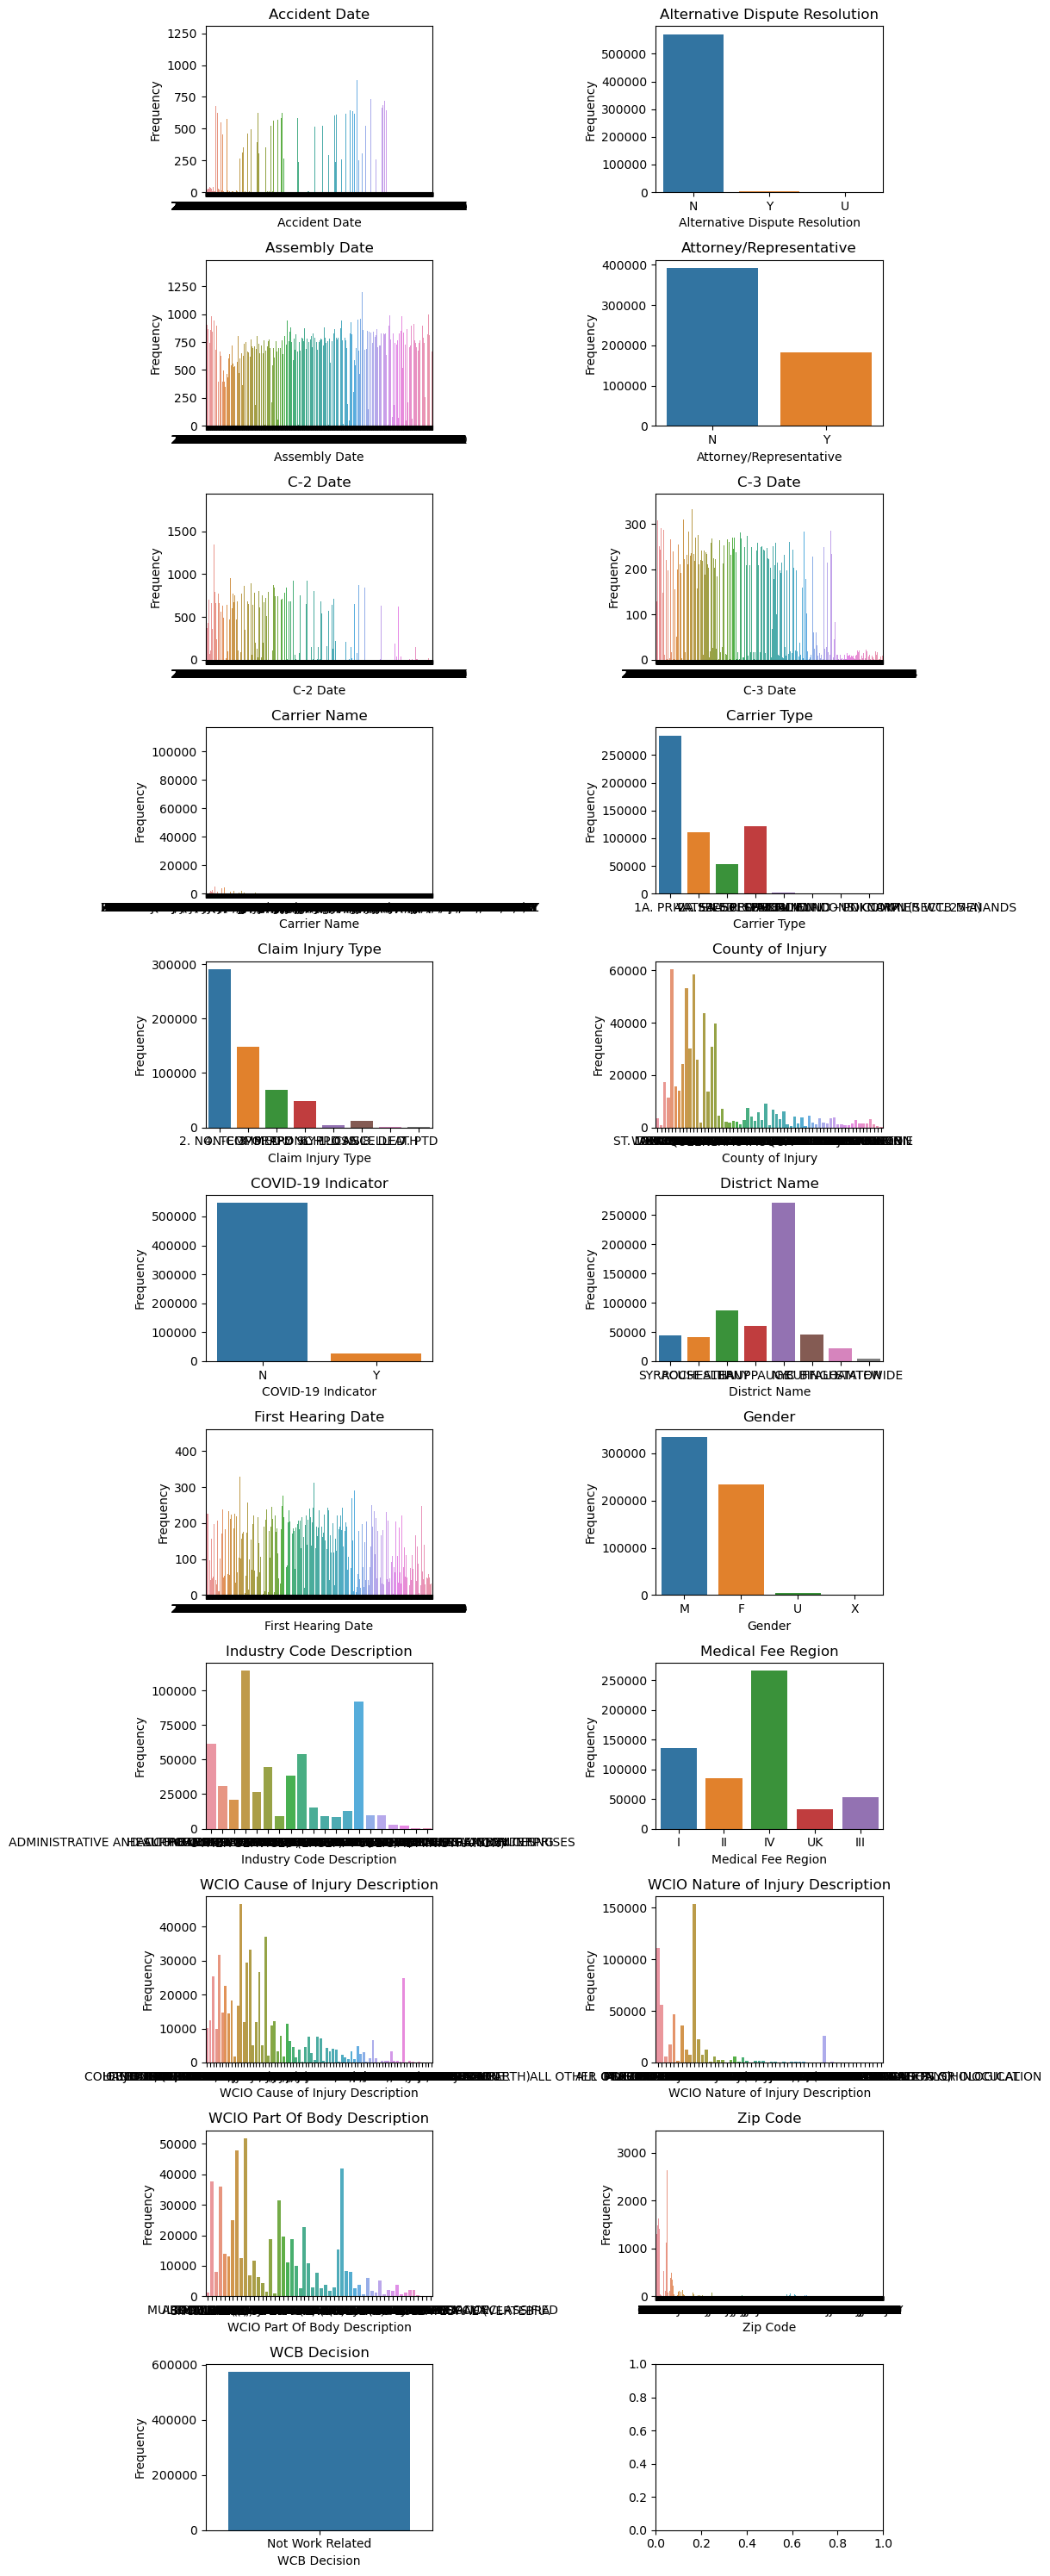

In [55]:
fig, axes = plt.subplots(11, 2, figsize=(12, 30), tight_layout=True)

axes = axes.flatten()

for i, column in enumerate(df_non_numeric):
    sns.countplot(x=df_non_numeric[column], ax=axes[i])
    axes[i].set_title(f'{column}')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()  
plt.show()

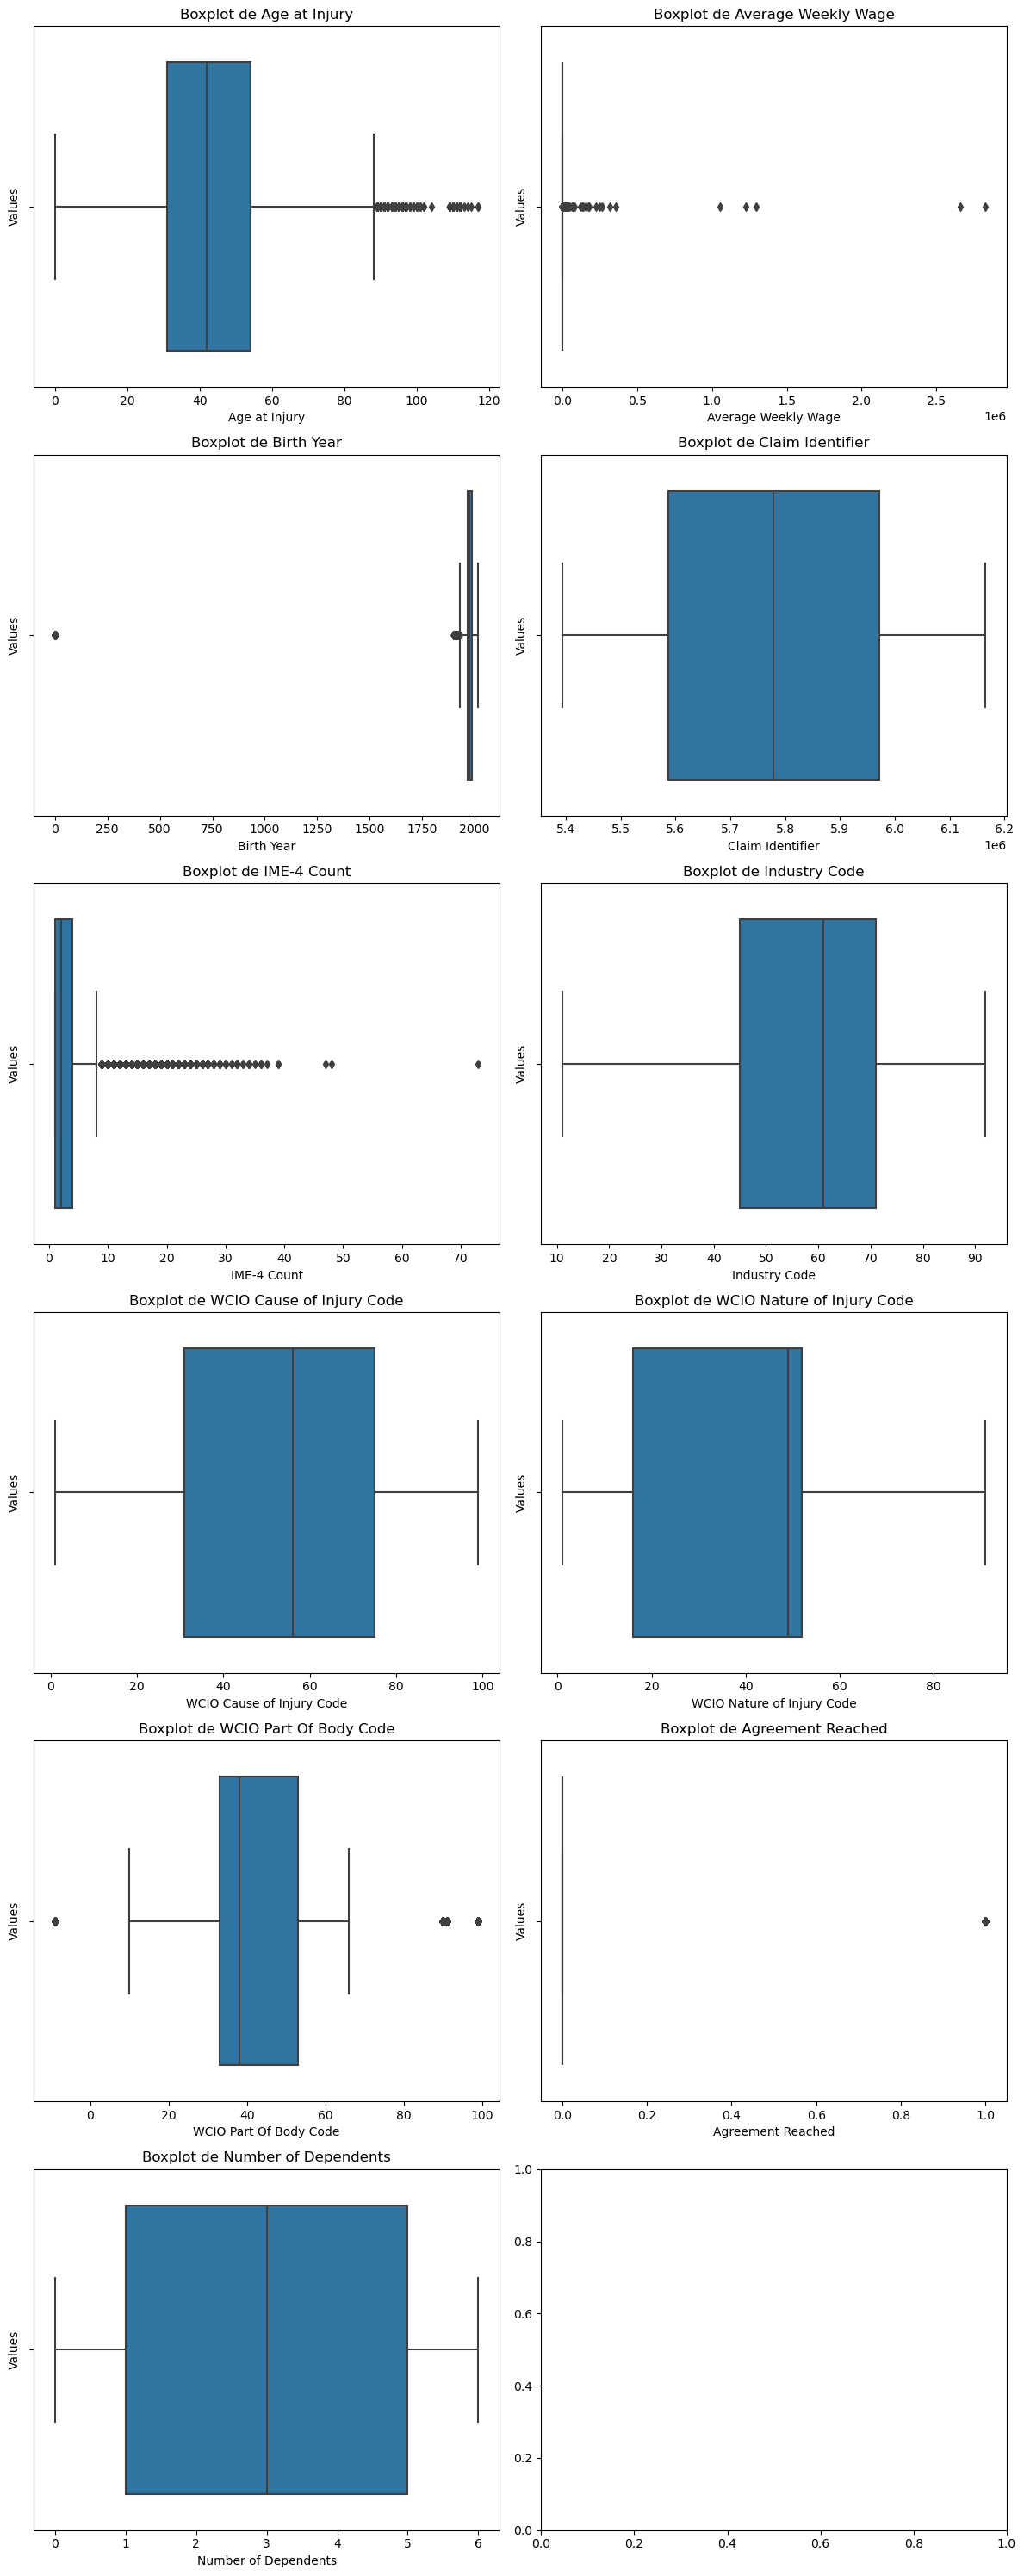

In [56]:
fig, axes = plt.subplots(6, 2, figsize=(12, 30), tight_layout=True)

axes = axes.flatten()

for i, column in enumerate(df_numeric):
    sns.boxplot(x=df_numeric[column], ax=axes[i])
    axes[i].set_title(f'Boxplot de {column}')
    axes[i].set_ylabel('Values')

plt.tight_layout()  
plt.show()

In [57]:
#outliers no average weekly wage
#as 25081 observações q tem birth year 0 estão erradas
#fazer boxplot de claim identifier nao faz sentido pq sao valores unicos
#ver se outliers no WCIO Part of body code fazem sentido
#boxplot para agreement reached nao faz sentido pq é binaria
#boxplot de number of dependents tbm nao faz sentido pq é categorica

In [58]:
(df['Age at Injury']==0.0).sum()

5464

In [59]:
df[df['Age at Injury']==0.0]['Claim Injury Type'].value_counts()

Claim Injury Type
2. NON-COMP        2891
1. CANCELLED       1730
4. TEMPORARY        568
3. MED ONLY         251
5. PPD SCH LOSS      21
8. DEATH              2
6. PPD NSL            1
Name: count, dtype: int64

In [60]:
df['WCB Decision'].value_counts()

WCB Decision
Not Work Related    574026
Name: count, dtype: int64

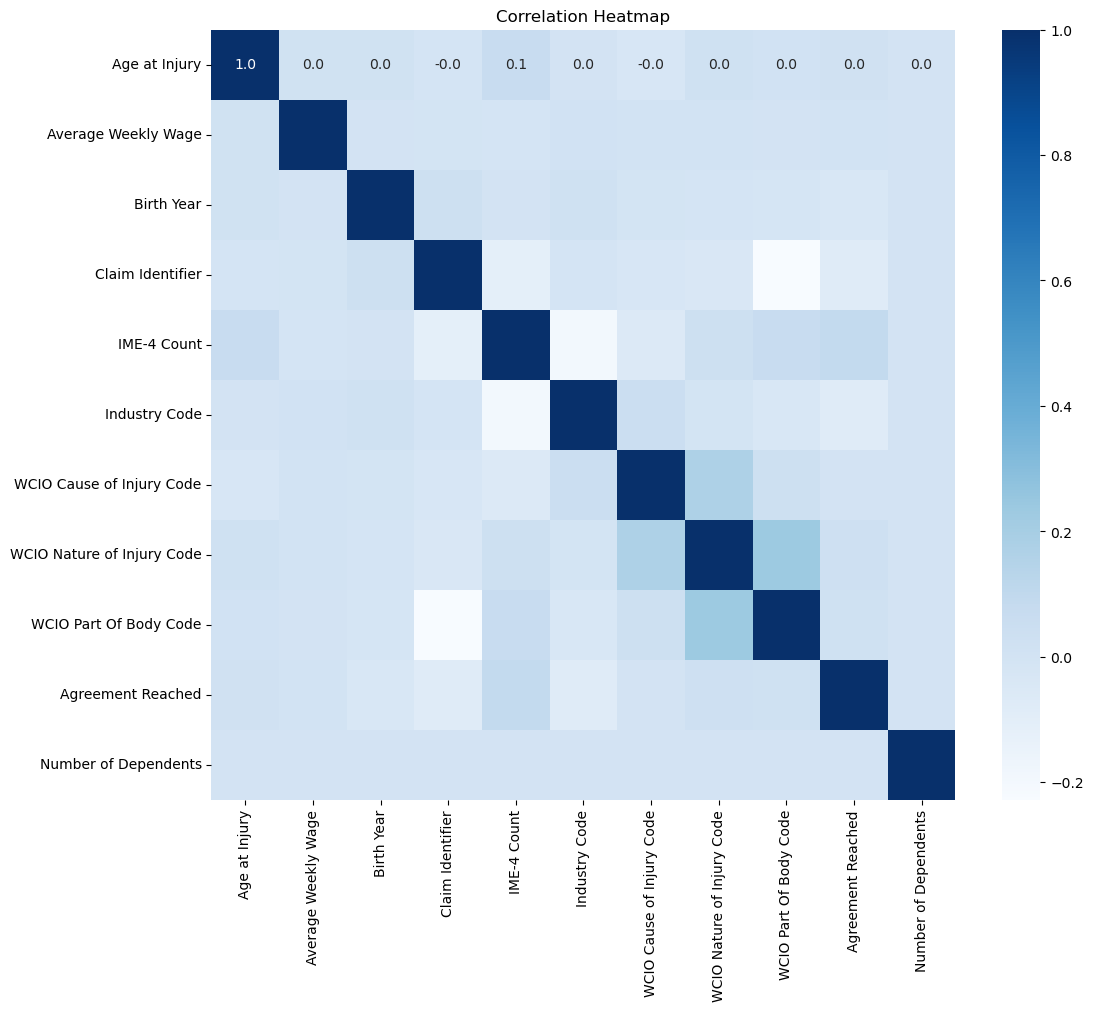

In [61]:
# Compute the correlation matrix for the numeric columns
corr_matrix = df_numeric.corr()

# Create the heatmap
plt.figure(figsize=(12,10))
sns.heatmap(data=corr_matrix, annot=True, cmap=plt.cm.Blues, fmt='.1f')

# Show the plot
plt.title('Correlation Heatmap')
plt.show()

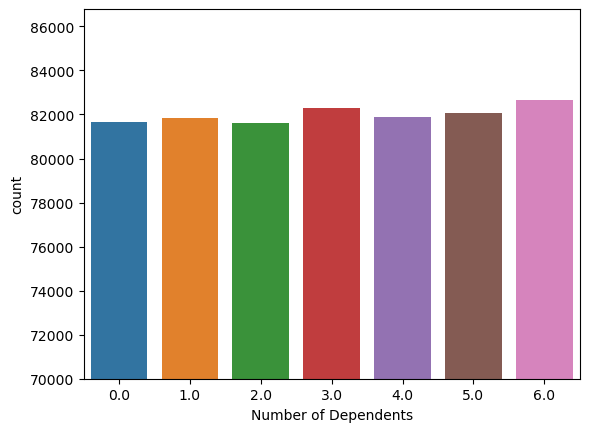

In [62]:
#number of dependents

sns.countplot(x=df['Number of Dependents'])
plt.ylim(70000, None)

#plt.pie(x=df['Number of Dependents'].dropna())

plt.show()

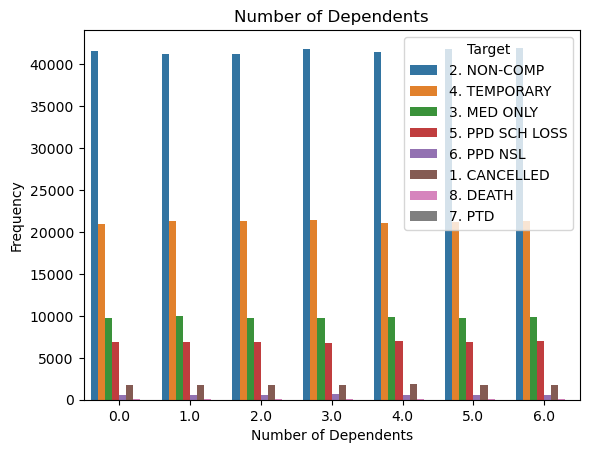

In [64]:
#number of dependents

sns.countplot(x='Number of Dependents', hue='Claim Injury Type', data=df)

# Ajustar título e rótulos
plt.title('Number of Dependents')
plt.xlabel('Number of Dependents')
plt.ylabel('Frequency')
plt.legend(title='Target')
plt.show()

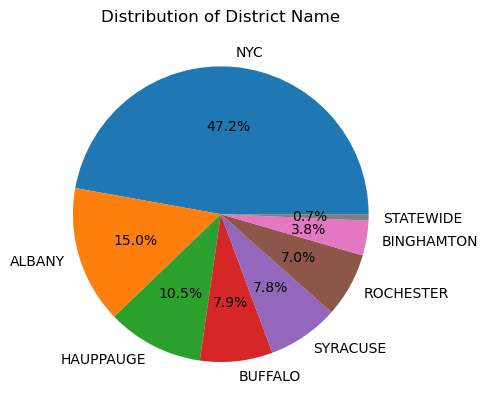

In [63]:
values= df['District Name'].dropna().value_counts()

plt.pie(values, labels=values.index.astype(str), autopct='%1.1f%%')
plt.title('Distribution of District Name')
plt.show()

# New Feature: Days Difference

In [65]:
# Converter as colunas para o formato de data, se ainda não estiverem
df['Accident Date'] = pd.to_datetime(df['Accident Date'])
df['Assembly Date'] = pd.to_datetime(df['Assembly Date'])

# Calcular a diferença de dias entre as duas colunas
df['Days Difference'] = (df['Assembly Date'] - df['Accident Date']).dt.days

# DataFrame com a nova coluna
print(df[['Accident Date', 'Assembly Date', 'Days Difference']])

       Accident Date Assembly Date  Days Difference
0         2019-12-30    2020-01-01              2.0
1         2019-08-30    2020-01-01            124.0
2         2019-12-06    2020-01-01             26.0
4         2019-12-30    2020-01-01              2.0
5         2019-12-26    2020-01-01              6.0
...              ...           ...              ...
593451    2022-12-14    2022-12-30             16.0
593455    2022-12-15    2022-12-31             16.0
593456    2022-12-13    2022-12-31             18.0
593457    2022-12-14    2022-12-31             17.0
593467    2022-12-13    2022-12-31             18.0

[574026 rows x 3 columns]


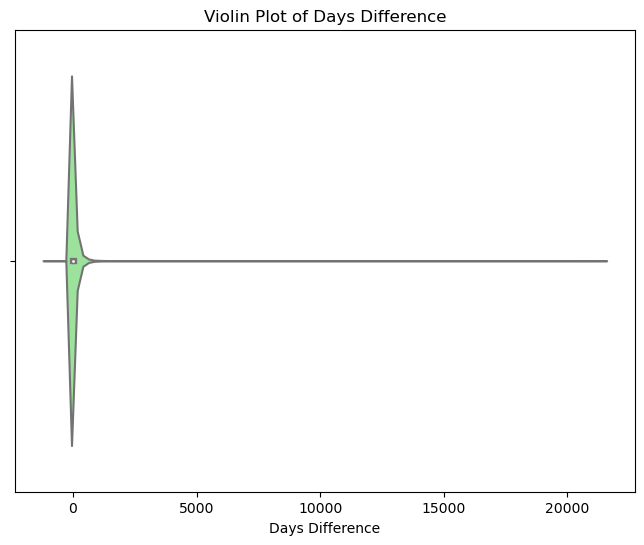

In [75]:
plt.figure(figsize=(8, 6))
sns.violinplot(x=df['Days Difference'], color="lightgreen")
plt.title('Violin Plot of Days Difference')
plt.xlabel('Days Difference')
plt.show()

# Relations Between Variables

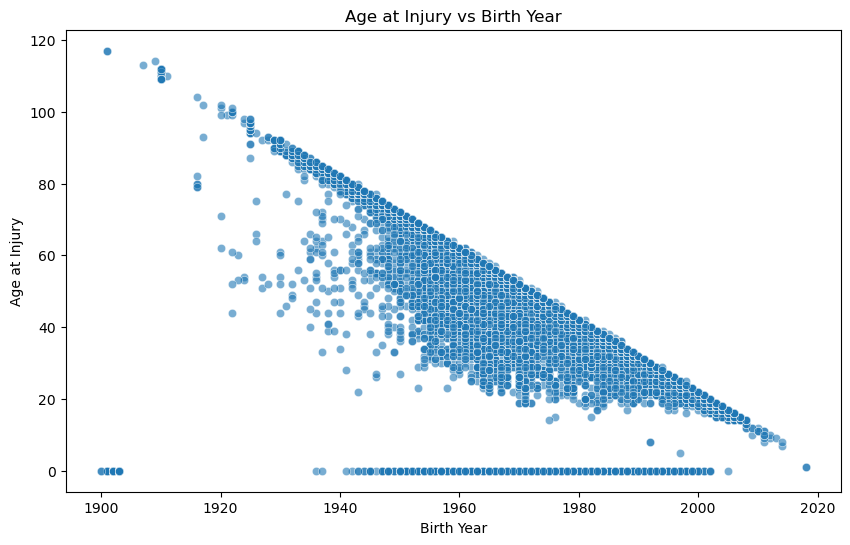

In [66]:
df_sem_ano0= df[df['Birth Year'] != 0]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Birth Year', y='Age at Injury', data=df_sem_ano0, alpha=0.6)
plt.title('Age at Injury vs Birth Year')
plt.xlabel('Birth Year')
plt.ylabel('Age at Injury')
plt.show()

c:\Users\matil\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\matil\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


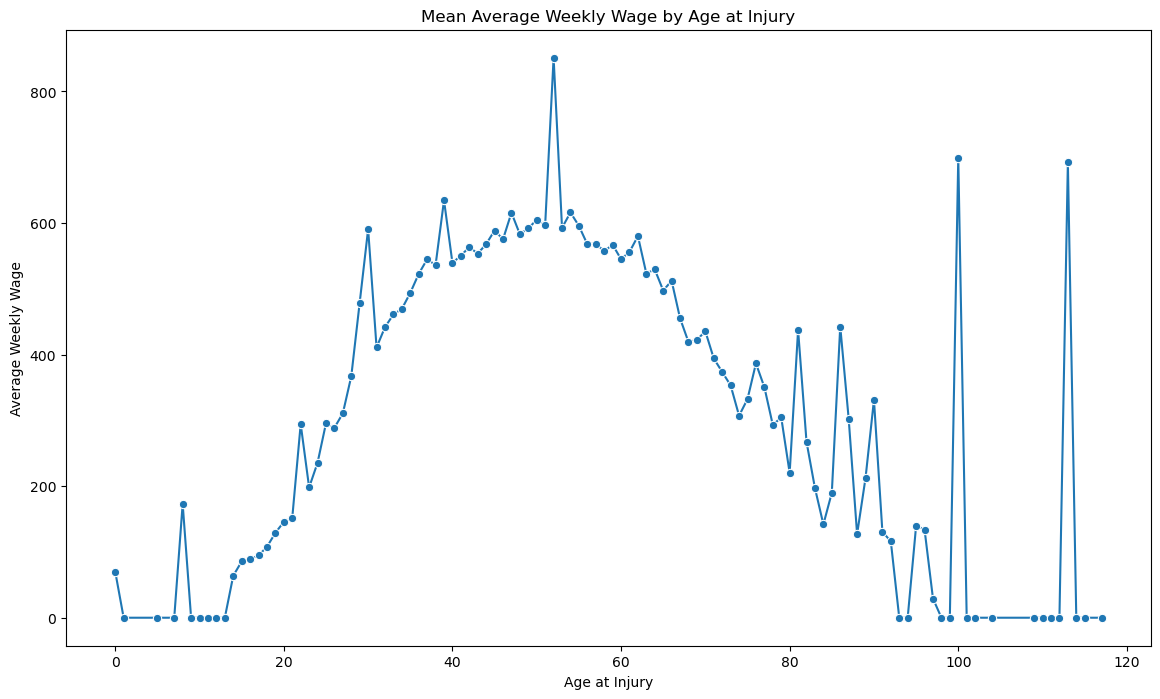

In [69]:
# Create a line plot
mean_wage_by_age = df.groupby('Age at Injury')['Average Weekly Wage'].mean().reset_index()

plt.figure(figsize=(14, 8))
sns.lineplot(x='Age at Injury', y='Average Weekly Wage', data=mean_wage_by_age, marker='o')

# Add title and labels
plt.title('Mean Average Weekly Wage by Age at Injury')
plt.xlabel('Age at Injury')
plt.ylabel('Average Weekly Wage')

# Show the plot
plt.show()

c:\Users\matil\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\matil\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


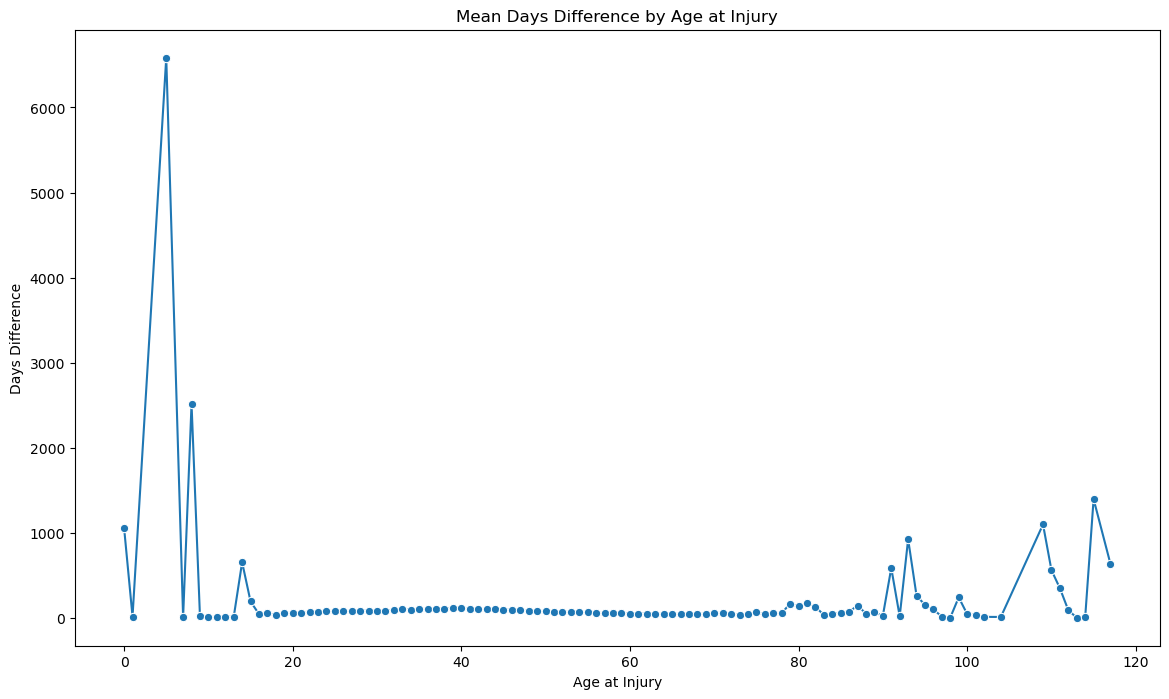

In [76]:
# Create a line plot
mean_daysdif_by_age = df.groupby('Age at Injury')['Days Difference'].mean().reset_index()

plt.figure(figsize=(14, 8))
sns.lineplot(x='Age at Injury', y='Days Difference', data=mean_daysdif_by_age, marker='o')

# Add title and labels
plt.title('Mean Days Difference by Age at Injury')
plt.xlabel('Age at Injury')
plt.ylabel('Days Difference')

# Show the plot
plt.show()

In [ ]:
# há mais eficiencia entre os 15 e os 85

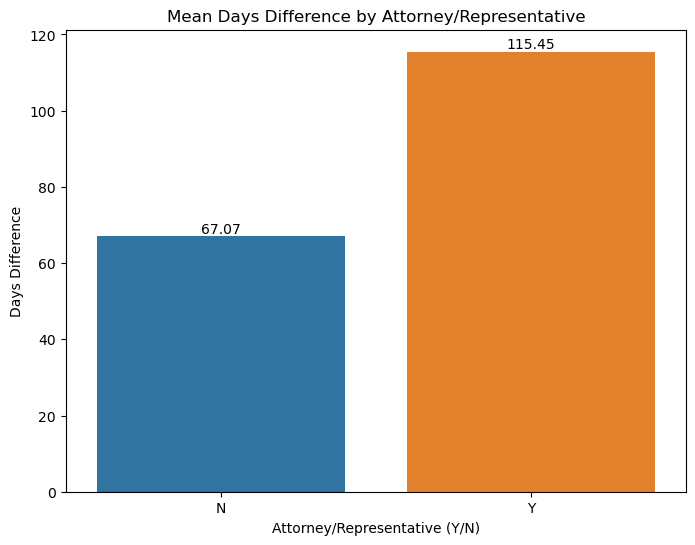

In [80]:
mean_daysdif_by_lawyer = df.groupby('Attorney/Representative')['Days Difference'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x='Attorney/Representative', y='Days Difference', data=mean_daysdif_by_lawyer)

# Add title and labels
plt.title('Mean Days Difference by Attorney/Representative')
plt.xlabel('Attorney/Representative (Y/N)')
plt.ylabel('Days Difference')

# Annotate the bar plot with the actual mean values
for index, row in mean_daysdif_by_lawyer.iterrows():
    bar_plot.text(index, row['Days Difference'], f"{row['Days Difference']:.2f}", 
                  color='black', ha="center", va="bottom")

# Show the plot
plt.show()

In [ ]:
# mais eficiencia quando nao ha attorney, também pode estar relacionado com o tempo para arranjar um attorney

c:\Users\matil\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\matil\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


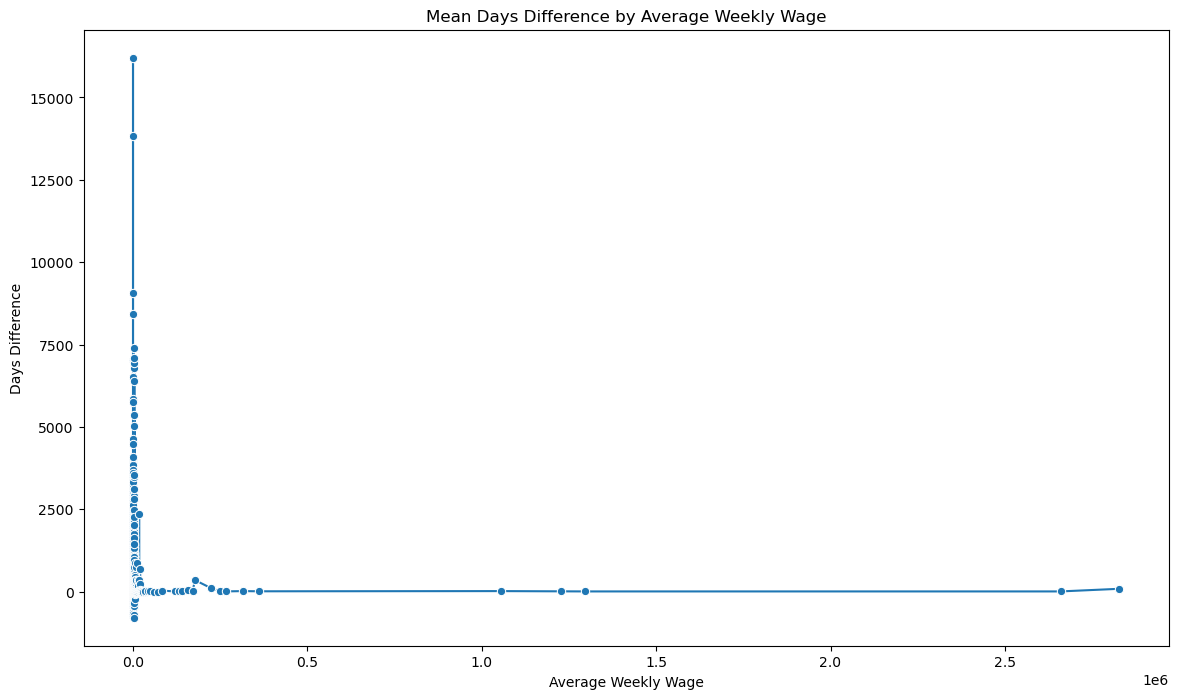

In [79]:
# Create a line plot
mean_daysdif_by_wage = df.groupby('Average Weekly Wage')['Days Difference'].mean().reset_index()

plt.figure(figsize=(14, 8))
sns.lineplot(x='Average Weekly Wage', y='Days Difference', data=mean_daysdif_by_wage, marker='o')

# Add title and labels
plt.title('Mean Days Difference by Average Weekly Wage')
plt.xlabel('Average Weekly Wage')
plt.ylabel('Days Difference')

# Show the plot
plt.show()

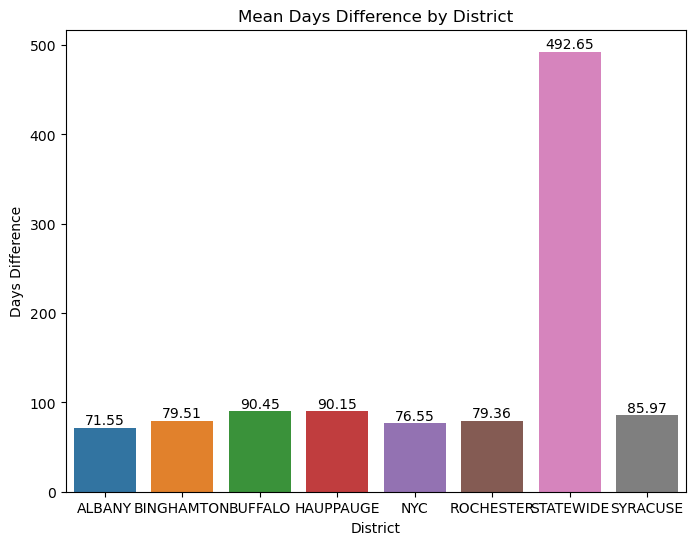

In [84]:
mean_daysdif_by_district = df.groupby('District Name')['Days Difference'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x='District Name', y='Days Difference', data=mean_daysdif_by_district)

# Add title and labels
plt.title('Mean Days Difference by District')
plt.xlabel('District')
plt.ylabel('Days Difference')

# Annotate the bar plot with the actual mean values
for index, row in mean_daysdif_by_district.iterrows():
    bar_plot.text(index, row['Days Difference'], f"{row['Days Difference']:.2f}", 
                  color='black', ha="center", va="bottom")

# Show the plot
plt.show()

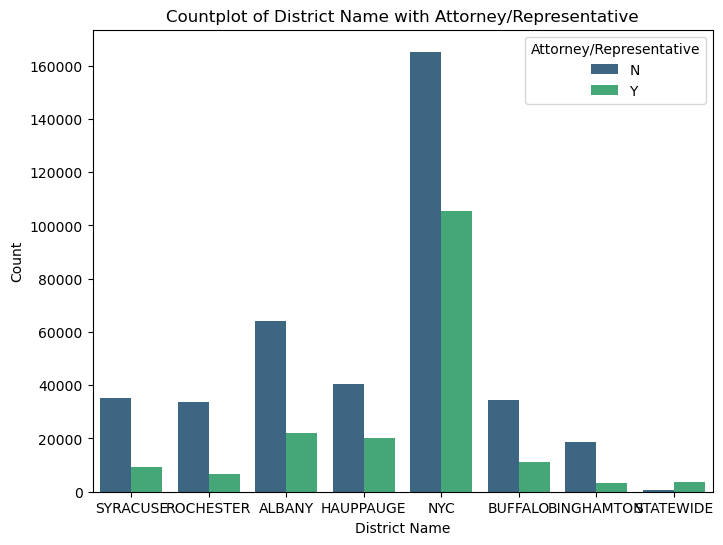

In [86]:
plt.figure(figsize=(8, 6))
sns.countplot(x='District Name', hue='Attorney/Representative', data=df, palette='viridis')

# Adicionar rótulos e título
plt.title('Countplot of District Name with Attorney/Representative')
plt.xlabel('District Name')
plt.ylabel('Count')
plt.legend(title='Attorney/Representative')
plt.show()

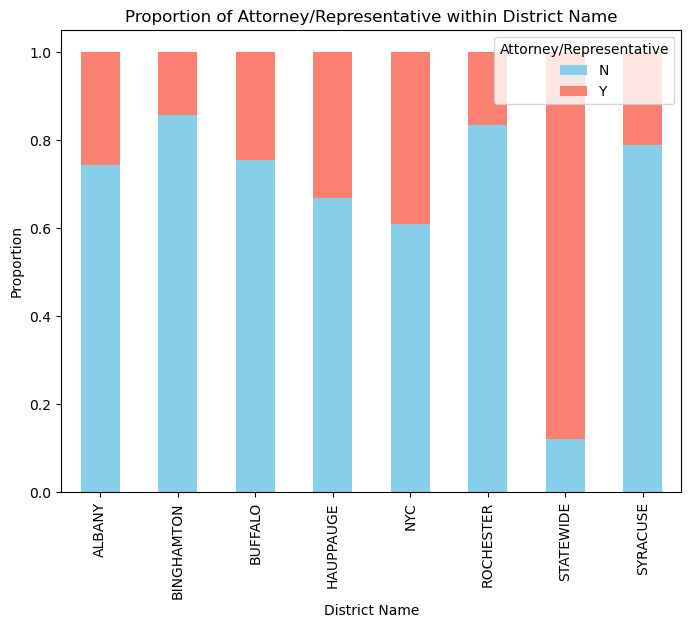

In [88]:
cross_tab = pd.crosstab(df['District Name'], df['Attorney/Representative'], normalize='index')

# Plotar o gráfico de barras empilhadas com proporções
cross_tab.plot(kind='bar', stacked=True, figsize=(8, 6), color=['skyblue', 'salmon'])

# Adicionar rótulos e título
plt.title('Proportion of Attorney/Representative within District Name')
plt.xlabel('District Name')
plt.ylabel('Proportion')
plt.legend(title='Attorney/Representative', loc='upper right')
plt.show()

In [ ]:
# em statewide é onde há menos eficiencia mas tambem onde ha mais attorneys